In [28]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
fare_values.shape

(891,)

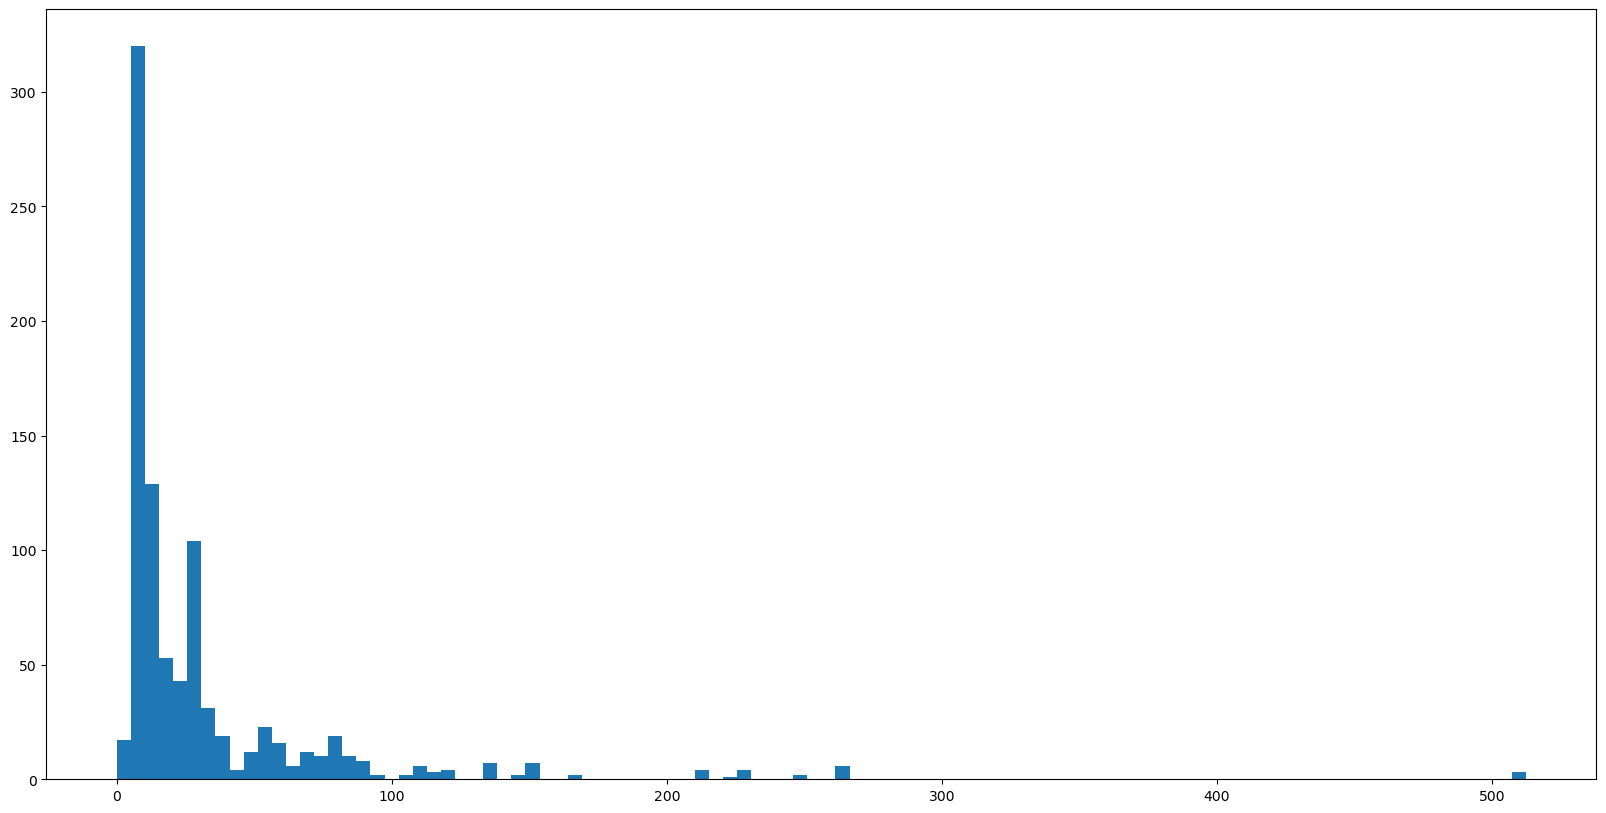

In [30]:
plt.figure(figsize=(20,10))
plt.hist(fare_values, bins=100)
plt.show()

# średnia

In [31]:
mean_fare = np.round(np.mean(fare_values))
mean_fare

32.0

# mediana

In [32]:
median_fare = np.median(fare_values)
median_fare

14.4542

# moda

In [33]:
mode_fare = stats.mode(fare_values)
mode_fare

C:\Users\kulin\AppData\Local\Temp\ipykernel_30816\3670647635.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare_values)


ModeResult(mode=array([8.05]), count=array([43]))

# kwartyle

In [34]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


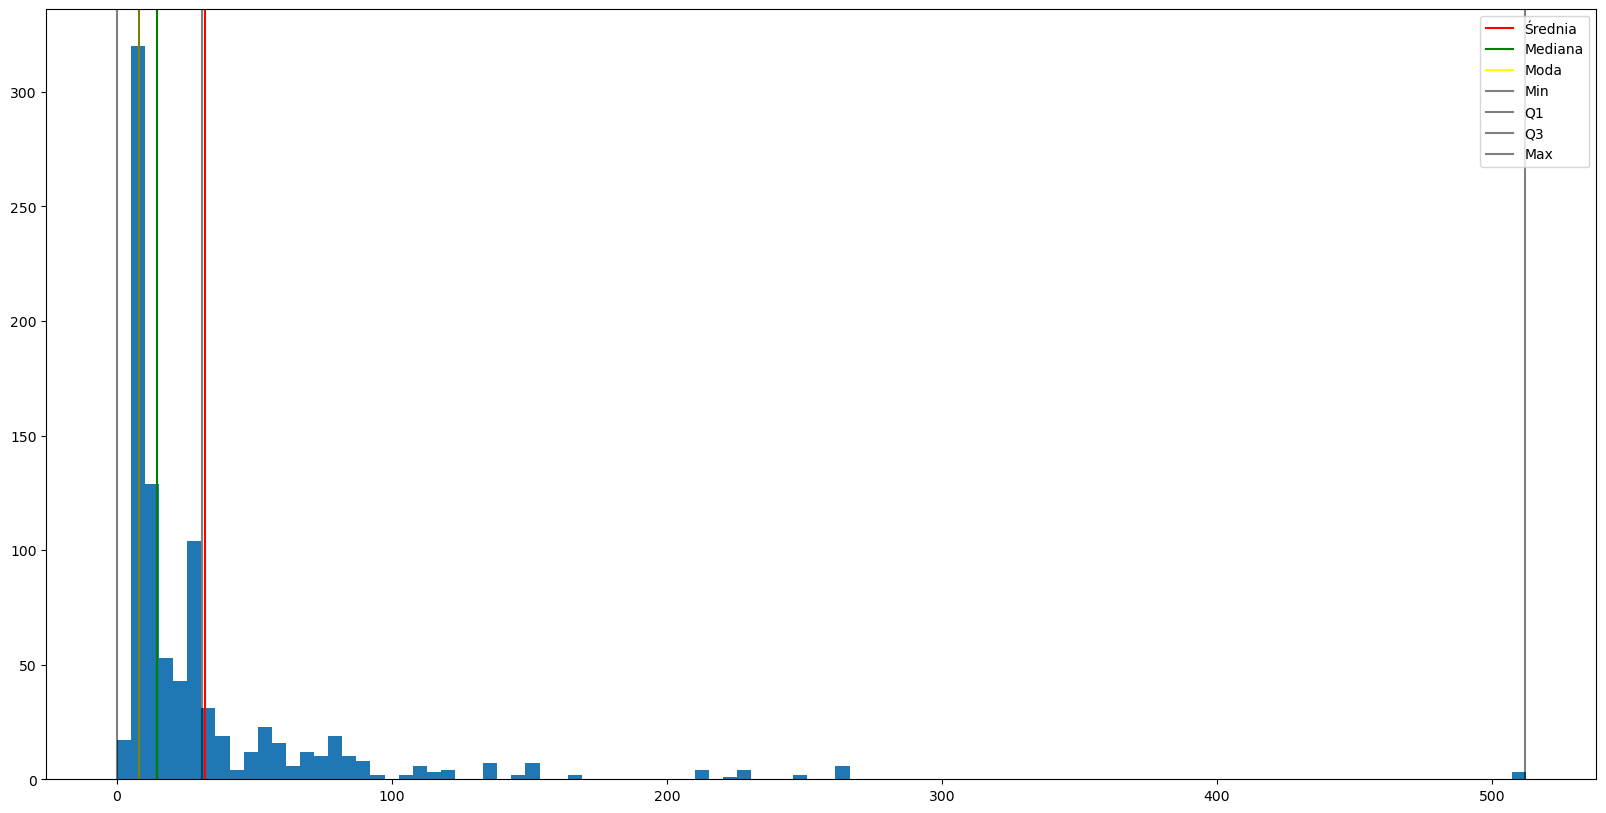

In [35]:
plt.figure(figsize=(20,10))
plt.hist(fare_values, bins=100)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='yellow', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min',alpha=0.5)
plt.axvline(x = q1, color='black', label = 'Q1',alpha=0.5)
plt.axvline(x = q3, color='black', label = 'Q3',alpha=0.5)
plt.axvline(x = q4, color='black', label = 'Max',alpha=0.5)
plt.legend(loc='upper right')
plt.show()

# zakres

In [36]:
range_fare = max(fare_values) - min(fare_values)
range_fare

512.3292

# rozstęp międzykwartylowy - IQR

In [37]:
iqr = q3 - q1
iqr

23.0

# wykres pudełkowy

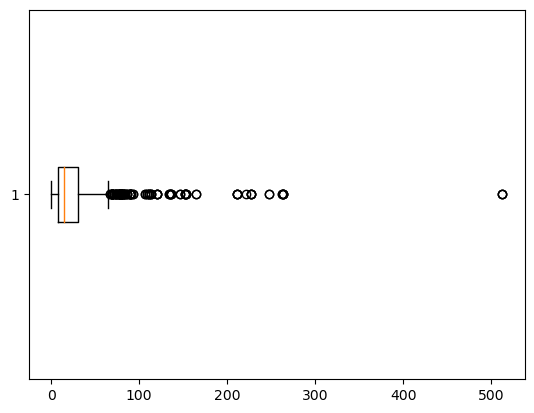

In [38]:
plt.boxplot(fare_values, vert=False)
plt.show()

# wariancja

In [39]:
variance_fare = np.var(fare_values, ddof=1)
variance_fare

2469.436845743116

# odchylenie standardowe

In [40]:
variance_fare**(1/2)

49.6934285971809

In [41]:
standard_deviation_fare = np.std(fare_values, ddof=1)
standard_deviation_fare

49.6934285971809

# standaryzacja danych

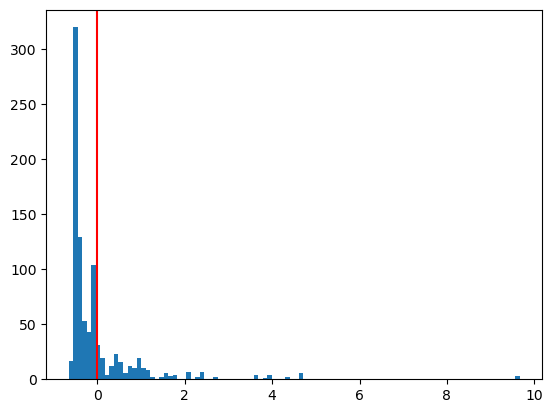

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [42]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=100)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

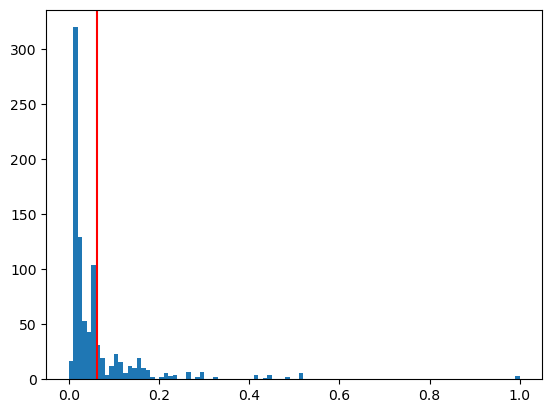

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [43]:
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=100)
plt.axvline(x = normalized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')